In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.svm   import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import OneHotEncoder
from scipy import sparse
from google.colab import drive
drive.mount('/content/drive')
#drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [2]:
dataset = pd.read_csv('/content/drive/MyDrive/outputnew.csv')
dataset.head()
dataset.shape

(1227, 38)

In [3]:
X = dataset.loc[:,(dataset.columns != 'Label')] #mentioning what are independent variables
X.head()


,RMSE,ZCR,Spectral Centroid,Spectral Bandwidth,Spectral Contrast,MFCC_1,MFCC_2,MFCC_3,MFCC_4,MFCC_5,...,Chroma_3,Chroma_4,Chroma_5,Chroma_6,Chroma_7,Chroma_8,Chroma_9,Chroma_10,Chroma_11,Chroma_12
0,0.099366,0.034296,901.440072,1301.021793,19.436539,-178.99489,191.29134,-21.595234,6.375634,10.101208,...,0.703092,0.660503,0.635359,0.646069,0.580407,0.583834,0.563806,0.562368,0.650692,0.678732
1,0.086133,0.081291,1365.421679,1567.409427,21.901306,-151.63579,156.18192,-32.853000,3.799665,-3.148706,...,0.279154,0.236776,0.259276,0.347202,0.277409,0.310216,0.356190,0.423478,0.845497,0.421606
2,0.115005,0.038803,1025.437895,1537.384412,19.498672,-146.07472,173.69655,-11.139687,13.415001,11.658173,...,0.549732,0.614669,0.622880,0.431823,0.391049,0.423167,0.490465,0.542430,0.570529,0.632635
3,0.111000,0.033954,1051.805010,1573.984463,19.330489,-152.21115,168.60114,-12.617308,13.377914,9.031705,...,0.641550,0.543675,0.486688,0.431743,0.555818,0.568199,0.581028,0.684014,0.693551,0.785429
4,0.088206,0.041023,972.925256,1327.958199,19.677013,-189.70117,187.08330,-23.920116,11.181483,8.873098,...,0.488388,0.446810,0.410485,0.392210,0.390582,0.447418,0.528939,0.596902,0.694749,0.742713


In [4]:
y = dataset[["Label"]]
y.head()

,Label
0,traffic
1,traffic
2,traffic
3,traffic
4,traffic


In [5]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Encode the target variable
y = label_encoder.fit_transform(y)

y_dataframe = pd.DataFrame(y, columns=['Label'])

# Print the pandas DataFrame
y_dataframe.head()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Label
0,5
1,5
2,5
3,5
4,5


In [6]:
dataset.dtypes

RMSE                  float64
ZCR                   float64
Spectral Centroid     float64
Spectral Bandwidth    float64
Spectral Contrast     float64
MFCC_1                float64
MFCC_2                float64
MFCC_3                float64
MFCC_4                float64
MFCC_5                float64
MFCC_6                float64
MFCC_7                float64
MFCC_8                float64
MFCC_9                float64
MFCC_10               float64
MFCC_11               float64
MFCC_12               float64
MFCC_13               float64
MFCC_14               float64
MFCC_15               float64
MFCC_16               float64
MFCC_17               float64
MFCC_18               float64
MFCC_19               float64
MFCC_20               float64
Chroma_1              float64
Chroma_2              float64
Chroma_3              float64
Chroma_4              float64
Chroma_5              float64
Chroma_6              float64
Chroma_7              float64
Chroma_8              float64
Chroma_9  

In [8]:
y_dataframe['Label'].value_counts()

3    227
5    200
2    200
0    200
1    200
4    200
Name: Label, dtype: int64

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import svm

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_dataframe, test_size=0.1, random_state=42)
X_train.head()


,RMSE,ZCR,Spectral Centroid,Spectral Bandwidth,Spectral Contrast,MFCC_1,MFCC_2,MFCC_3,MFCC_4,MFCC_5,...,Chroma_3,Chroma_4,Chroma_5,Chroma_6,Chroma_7,Chroma_8,Chroma_9,Chroma_10,Chroma_11,Chroma_12
746,0.121794,0.084634,1599.817336,1636.707865,23.757902,-152.549790,128.645430,-34.699318,26.952864,-21.389920,...,0.064195,0.166648,0.440138,0.447913,0.475773,0.365453,0.281995,0.129697,0.104660,0.109309
803,0.262700,0.092311,1403.934835,1070.794524,24.531730,-111.493675,166.135160,-93.287480,8.720502,-54.535152,...,0.166507,0.138085,0.131202,0.194430,0.251362,0.316944,0.306660,0.288915,0.325799,0.531705
567,0.070922,0.085554,1306.263386,1081.272202,24.441388,-361.303500,131.819320,-59.691840,-20.452717,-26.303602,...,0.088956,0.083715,0.089214,0.124849,0.173497,0.141555,0.167647,0.276630,0.318079,0.379038
342,0.184702,0.154331,2248.351027,1786.316796,23.105733,-58.282640,95.304855,-65.841850,2.399771,-33.876700,...,0.334319,0.327574,0.369187,0.450694,0.277508,0.415726,0.193971,0.283492,0.308619,0.269805
240,0.226958,0.133027,1908.934193,1476.306793,24.303493,-84.698906,117.882180,-78.134810,6.887709,-28.960077,...,0.294245,0.331269,0.322420,0.251103,0.139741,0.164049,0.290958,0.216644,0.181525,0.164798


In [10]:
# Create an SVM classifier
svm_classifier = svm.SVC(kernel='linear')

# Train the classifier on the training data
svm_classifier.fit(X_train, y_train)

# Test the classifier on the test data
accuracy = svm_classifier.score(X_test, y_test)

print(f'Testing Accuracy: {accuracy}')

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Testing Accuracy: 0.9024390243902439


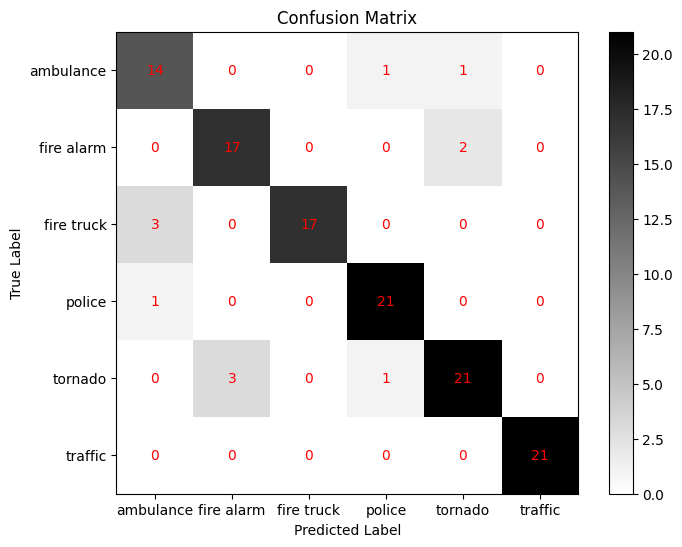

In [11]:
y_pred= svm_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
classes = ["ambulance", "fire alarm", "fire truck", "police", "tornado", "traffic"]

# Plot confusion matrix
plt.figure(figsize=(8, 6))

plt.imshow(cm, interpolation='nearest', cmap=plt.cm.binary)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='red')

plt.show()

In [12]:
import numpy as np
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=classes,digits=4))

              precision    recall  f1-score   support

   ambulance     0.7778    0.8750    0.8235        16
  fire alarm     0.8500    0.8947    0.8718        19
  fire truck     1.0000    0.8500    0.9189        20
      police     0.9130    0.9545    0.9333        22
     tornado     0.8750    0.8400    0.8571        25
     traffic     1.0000    1.0000    1.0000        21

    accuracy                         0.9024       123
   macro avg     0.9026    0.9024    0.9008       123
weighted avg     0.9070    0.9024    0.9031       123

